In [ ]:
# Install packages
# Remember to Restart runtime after installation

# Change the versions to match the ones present in the docker image
!pip install itk==5.3rc4
!pip install vtk
!pip install itkwidgets
!pip install icon-registration==0.3.4
!pip install graphviz
!pip install tornado==6.1
!pip install coiled==0.0.76
!pip install dask==2022.03.0
!pip install distributed==2022.3.0
!pip install boto3
!pip install jupyter
!pip install pandas==1.4.3
!pip install numpy==1.21.5
!pip install lz4==4.0.0
!pip install git+https://github.com/uncbiag/mermaid.git
!pip install git+https://github.com/uncbiag/easyreg.git
!pip install git+https://github.com/uncbiag/OAI_analysis_2.git#egg=oai_package

In [1]:
# All Imports

import coiled
import dask
from dask import compute, visualize, delayed

import itk
import vtk
import itkwidgets
from oai_analysis_2 import dask_processing as dp
import matplotlib.pyplot as plt

In [2]:
# Create Coiled Cluster with 2 workers

name = 'oai-processing21'

cluster = coiled.Cluster(
    n_workers=4,
    scheduler_cpu=4,
    scheduler_memory="16 GiB",
    worker_cpu=4,
    worker_memory="16 GiB",
    worker_gpu=1,
    name=name,
    worker_class="dask_cuda.CUDAWorker",
    software="gpu-test9",
)

client = dask.distributed.Client(cluster)

cluster

Output()

Found software environment build
Created fw rule: inbound [8786-8787] [0.0.0.0/0] []
Created FW rules: coiled-dask-pranjal09-154052-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-pranjal09-154052-firewall -> coiled-dask-pranjal09-154052-firewall]
Created FW rules: coiled-dask-pranjal09-154052-cluster-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-pranjal09-154052-cluster-firewall -> coiled-dask-pranjal09-154052-cluster-firewall]
Created scheduler VM: coiled-dask-pranjal09-154052-scheduler (type: t3.xlarge, ip: ['54.196.182.122'])


Mismatched versions found

+-------------+----------------+----------------+----------------+
| Package     | client         | scheduler      | workers        |
+-------------+----------------+----------------+----------------+
| cloudpickle | 2.0.0          | 2.1.0          | 2.1.0          |
| pandas      | 1.3.1          | 1.4.2          | 1.4.2          |
| python      | 3.8.12.final.0 | 3.9.13.final.0 | 3.9.13.final.0 |
+-------------+----------------+----------------+----------------+


In [75]:
# Main execution block

all_results = []
months_array = ['ENROLLMENT', '12_MONTH', '24_MONTH', '48_MONTH', '72_MONTH', '96_MONTH']
knee_type = 'LEFT_KNEE'
patient_id = '9010060'

for month in months_array:
    image_path = patient_id + '/MR_SAG_3D_DESS/' + knee_type + '/' + month + '/image_preprocessed.nii.gz'

    fc_probmap, tc_probmap = dp.segment_method(image_path)
    phi_AB, image_A, image_B = dp.register_images_delayed(
        image_path, 'atlas_image.nii.gz')

    deformed_fc = dp.deform_probmap_delayed(phi_AB, image_A, image_B,
                                            fc_probmap, 'FC')
    deformed_tc = dp.deform_probmap_delayed(phi_AB, image_A, image_B,
                                            tc_probmap, 'TC')

    thickness_fc = dp.get_thickness(deformed_fc, 'FC')
    thickness_tc = dp.get_thickness(deformed_tc, 'TC')

    result = [thickness_fc, thickness_tc]

    all_results.append(result)

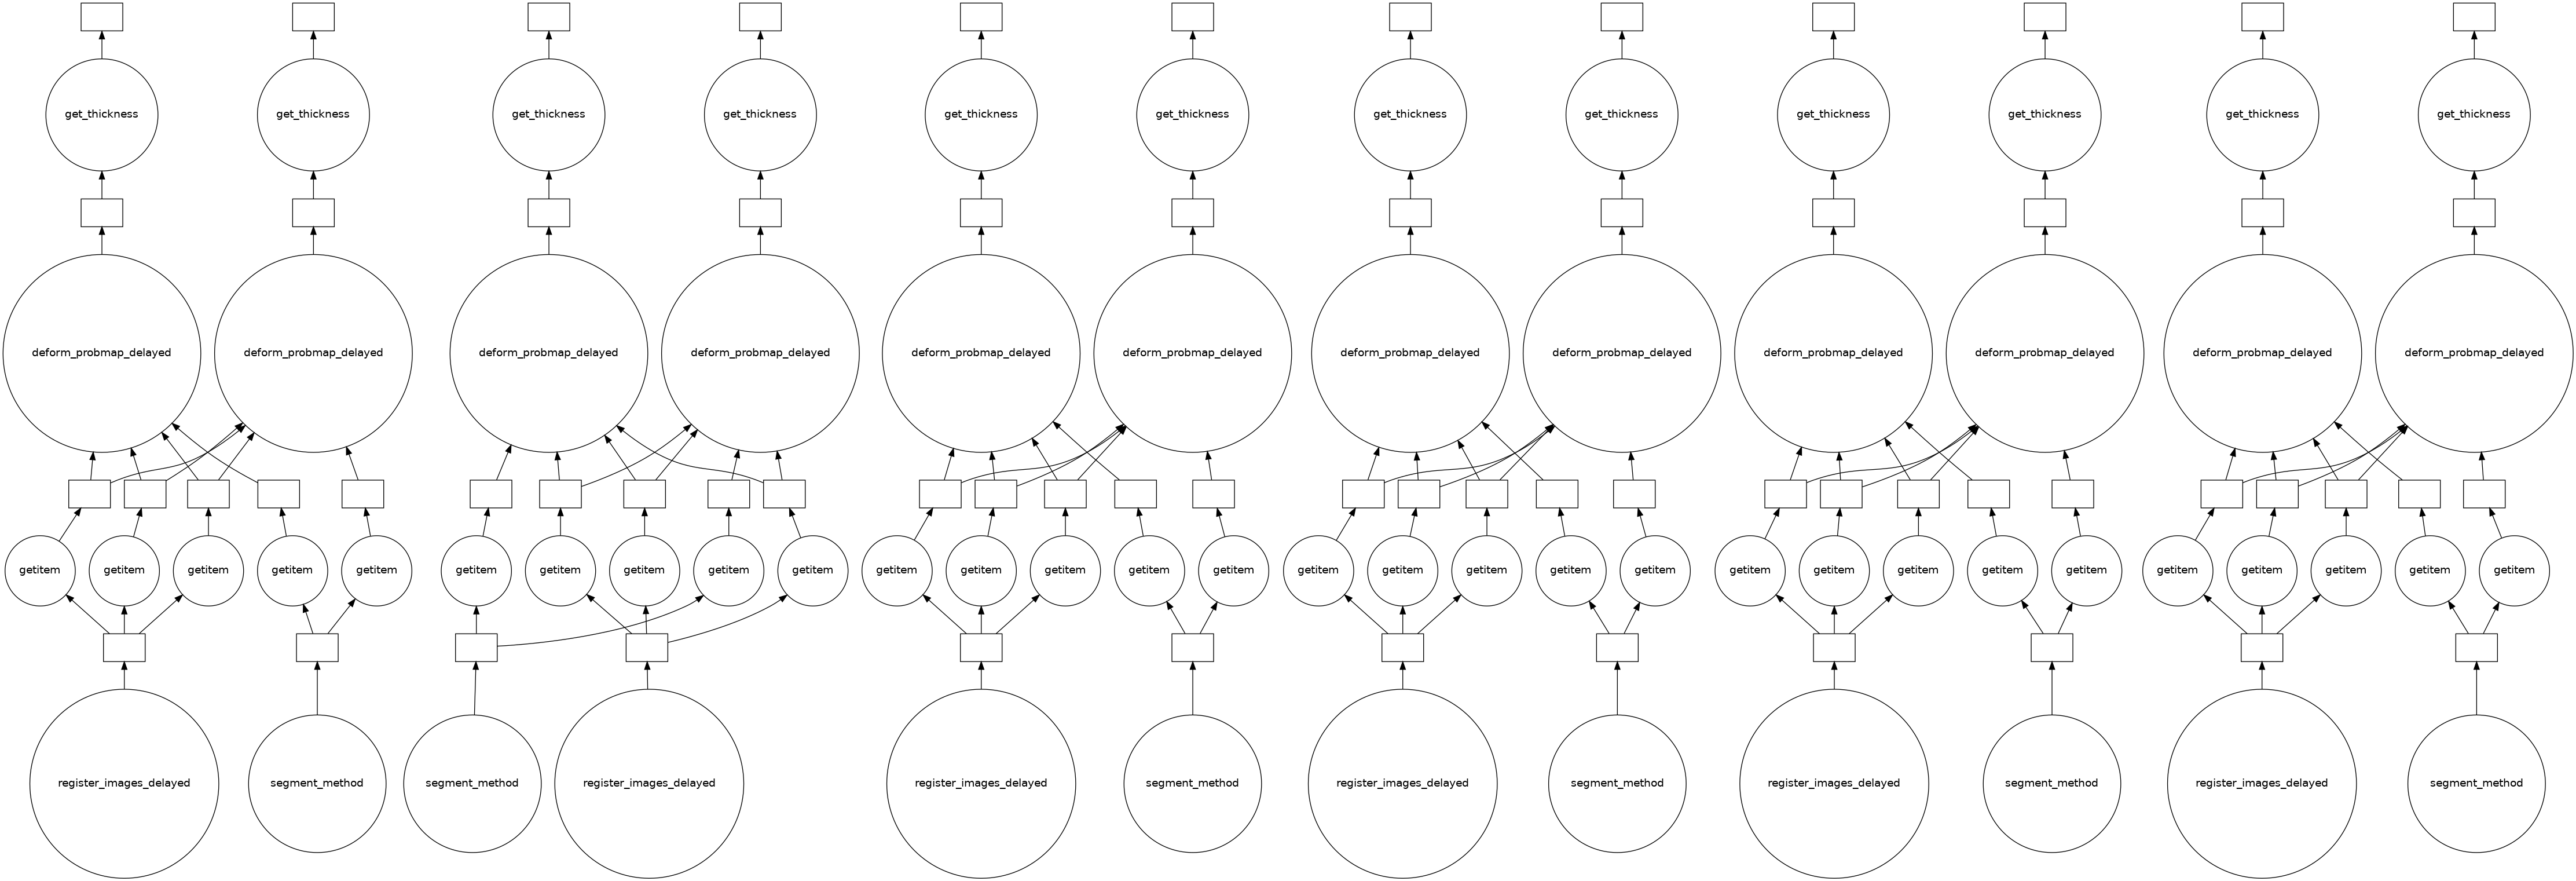

In [76]:
# Visualize Dask Computation Graph

visualize(*all_results)

In [77]:
%%time

output_result = compute(*all_results)

CPU times: user 228 ms, sys: 71.8 ms, total: 300 ms
Wall time: 1min 57s


In [78]:
# Write the meshes as vtk files

for i in range(len(output_result)):
    distance_inner_FC = itk.mesh_from_dict(output_result[i][0])
    distance_inner_TC = itk.mesh_from_dict(output_result[i][1])

    itk.meshwrite(distance_inner_FC, months_array[i]+'_itk_distance_inner_FC.vtk')
    itk.meshwrite(distance_inner_TC, months_array[i]+'_itk_distance_inner_TC.vtk')

In [79]:
# Read the meshes for viewing

month = months_array[5]

v1 = vtk.vtkPolyDataReader()
v1.SetFileName(month+'_itk_distance_inner_FC.vtk')
v1.Update()
m1 = v1.GetOutput()

v2 = vtk.vtkPolyDataReader()
v2.SetFileName(month+'_itk_distance_inner_TC.vtk')
v2.Update()
m2 = v2.GetOutput()

In [80]:
# Visualize the meshes

itkwidgets.view(geometries=[m1, m2])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [10]:
#cluster.close()

Cluster deleted successfully.

2022-06-04 15:12:21,105 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [31]:
import coiled
import dask
from dask import compute, visualize, delayed

In [148]:
import coiled

cluster = coiled.Cluster(
    name='gpucluster7',
    scheduler_vm_types=['t3.medium'],
    worker_vm_types=["g4dn.xlarge", "p3.2xlarge"],
    software="pranjal-sahu/gpu-test7_temp",
    shutdown_on_close=True,
)

client = dask.distributed.Client(cluster)

Output()

In [ ]:
import dask
from dask import compute, visualize, delayed


@delayed
def check_pytorch1():
    #import dask
    #return dask.__version__
    import os
    import torch
    import sys
    import platform
    #from sys import platform
    #return platform.platform()
    #return platform
    
    import numpy as np
    a = torch.Tensor(np.array([1, 7])).to(device='cuda')
    b = torch.Tensor(np.array([4, 1])).to(device='cuda')
    c = a+  b
    #return c.data.cpu()
    
    #os.system('pip install itk==5.3rc4.post2')
    #return 'Installation done'
    #os.environ["CONDA_DEFAULT_ENV"] = "coiled"
    import subprocess
    #output = subprocess.check_output(['conda', 'info', '--envs'])
    #output = subprocess.check_output(['pip', 'install', '--upgrade',  'pip'])
    #output = subprocess.check_output(['ldd', '--version'])
    #output = subprocess.check_output(['pip', 'install', '--upgrade', 'pip'])
    output = subprocess.check_output(['pip', 'debug', '--verbose'])
    
    return output
    #output = subprocess.check_output(['conda', 'activate', 'coiled'])
    #os.system('source activate coiled')    
    #return torch.__version__
    #return os.environ.items()
    #return os.environ['CONDA_DEFAULT_ENV']
    #import torch
    #return torch.__version__
    #import subprocess
    #output = subprocess.check_output(['conda', 'info', '--envs'])
    #return output
    #output = subprocess.check_output(['conda', 'list'])
    #import torch
    #return torch.cuda.is_available()
    #return output
    #print(output)
    #import os
    #return os.system('conda list')
    #import dask
    #return dask.__version__
    #import torch
    #return torch.cuda.is_available()

out = check_pytorch1()
output_result = compute(out)
print(output_result)

In [ ]:
cluster.close()

In [ ]:
#output_result[0].split('\n')
for k in str(output_result[0].decode("utf-8")).split('\n'):
    print(k)

In [100]:
cluster.close()

In [111]:
coiled.create_software_environment(
    name="gpu-test7_temp",
    container="pranjalsahu/pranjal-sahu-gpu-test7")

Creating new software environment
Creating container-only software environment
Successfully saved software environment build


In [156]:
cluster.close()

2022-07-29 17:08:31,540 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [109]:
coiled.create_software_environment(
    name="gpu-test7",
    container="pytorch/pytorch:1.11.0-cuda11.3-cudnn8-runtime",
    conda_env_name="base",
    conda={
        "channels": [
            "rapidsai",
            "conda-forge",
            "defaults",
        ],
        "dependencies": [
            "dacoiled.create_software_environment(
    name="gpu-test9",
    container="pytorch/pytorch:1.11.0-cuda11.3-cudnn8-runtime",
    conda_env_name="base",
    conda={
        "channels": [
            "rapidsai",
            "conda-forge",
            "defaults",
        ],
        "dependencies": [
            "dask",
            "pytorch-gpu",
            "coiled-runtime"
        ],
    }
)sk",
            "pytorch-gpu",
            "python=3.10"
        ],
    }
)

Creating new docker_hub build
Creating new software environment
STEP 1: FROM pytorch/pytorch:1.11.0-cuda11.3-cudnn8-runtime
STEP 2: COPY environment.yml environment.yml
--> fb44ea166f4
STEP 3: RUN conda env update -n coiled -f environment.yml     && rm environment.yml     && conda clean --all -y     && echo "conda activate coiled" >> ~/.bashrc
Solving environment: ...working... done

tornado-6.1          | 645 KB    | ########## | 100% 
pyopenssl-22.0.0     | 49 KB     | ########## | 100% 
yaml-0.2.5           | 87 KB     | ########## | 100% 
libprotobuf-3.20.1   | 2.6 MB    | ########## | 100% 
libwebp-base-1.2.3   | 392 KB    | ########## | 100% 
libdeflate-1.12      | 78 KB     | ########## | 100% 
pytorch-gpu-1.11.0   | 9 KB      | ########## | 100% 
lz4-c-1.9.3          | 179 KB    | ########## | 100% 
cryptography-37.0.4  | 1.5 MB    | ########## | 100% 
jinja2-3.1.2         | 99 KB     | ########## | 100% 
giflib-5.2.1         | 77 KB     | ########## | 100% 
magma-2.5.4        

Removed cryptography-37.0.4-py38h2b5fc30_0.tar.bz2
---------------------------------------------------
Removed lz4-c-1.9.3-h9c3ff4c_1.tar.bz2

Removed libwebp-base-1.2.3-h166bdaf_2.tar.bz2
Removed giflib-5.2.1-h36c2ea0_2.tar.bz2
Removed libdeflate-1.12-h166bdaf_0.tar.bz2
Removed magma-2.5.4-h6103c52_2.tar.bz2
Removed heapdict-1.0.1-py_0.tar.bz2
Removed jpeg-9e-h166bdaf_2.tar.bz2
Removed libzlib-1.2.12-h166bdaf_2.tar.bz2
Removed pillow-9.2.0-py38h0ee0e06_0.tar.bz2
Removed llvm-openmp-14.0.4-he0ac6c6_0.tar.bz2
Removed zlib-1.2.12-h166bdaf_2.tar.bz2
Removed openjpeg-2.4.0-hb52868f_1.tar.bz2
Removed sqlite-3.39.2-h4ff8645_0.tar.bz2
Removed pyparsing-3.0.9-pyhd8ed1ab_0.tar.bz2
Removed zstd-1.5.2-h8a70e8d_2.tar.bz2
Removed bokeh-2.4.3-py38h578d9bd_0.tar.bz2
Removed cytoolz-0.12.0-py38h0a891b7_0.tar.bz2
Removed toolz-0.12.0-pyhd8ed1ab_0.tar.bz2
Removed python-3.8.0-h357f687_5.tar.bz2
Removed pthread-stubs-0.4-h36c2ea0_1001.tar.bz2
Removed brotlipy-0.7.0-py38h0a891b7_1004.tar.bz2
Removed lcms2

ServerError: Internal error occured, contact customer service and quote 584746ff-b8bf-41d2-bb8b-d71671b438be

In [157]:
coiled.create_software_environment(
    name="gpu-test9",
    container="pytorch/pytorch:1.11.0-cuda11.3-cudnn8-runtime",
    conda_env_name="base",
    conda={
        "channels": [
            "rapidsai",
            "conda-forge",
            "defaults",
        ],
        "dependencies": [
            "dask",
            "pytorch-gpu",
            "coiled-runtime"
        ],
    }
)

Creating new software environment
Creating new docker_hub build
STEP 1: FROM pytorch/pytorch:1.11.0-cuda11.3-cudnn8-runtime
STEP 2: COPY environment.yml environment.yml
--> Using cache d1d5917dfa8675c77beff84a30976fe7c01785025bc8c73297b3919e2f8d8413
--> d1d5917dfa8
STEP 3: RUN conda env update -n base -f environment.yml     && rm environment.yml     && conda clean --all -y     && echo "conda activate base" >> ~/.bashrc
Solving environment: ...working... done

packaging-21.3       | 36 KB     | ########## | 100% 
grpc-cpp-1.46.1      | 3.2 MB    | ########## | 100% 
xarray-2022.3.0      | 650 KB    | ########## | 100% 
aiobotocore-2.3.4    | 53 KB     | ########## | 100% 
libssh2-1.10.0       | 233 KB    | ########## | 100% 
libblas-3.9.0        | 13 KB     | ########## | 100% 
libev-4.33           | 104 KB    | ########## | 100% 
libtool-2.4.6        | 511 KB    | ########## | 100% 
cachetools-5.0.0     | 12 KB     | ########## | 100% 
openssl-1.1.1o       | 2.1 MB    | ########## | 10

pyrsistent-0.18.1    | 92 KB     | ########## | 100% 
typing-extensions-3. | 12 KB     | ########## | 100% 
cloudpickle-2.1.0    | 25 KB     | ########## | 100% 
librsvg-2.50.3       | 16.8 MB   | ########## | 100% 
zarr-2.11.3          | 115 KB    | ########## | 100% 
gflags-2.2.2         | 114 KB    | ########## | 100% 
libcrc32c-1.1.2      | 20 KB     | ########## | 100% 
numcodecs-0.9.1      | 1.0 MB    | ########## | 100% 
botocore-1.24.21     | 5.3 MB    | ########## | 100% 
glib-tools-2.68.4    | 86 KB     | ########## | 100% 
font-ttf-inconsolata | 94 KB     | ########## | 100% 
python-blosc-1.10.2  | 371 KB    | ########## | 100% 
nbconvert-6.4.5      | 6 KB      | ########## | 100% 
aws-sdk-cpp-1.8.185  | 1.9 MB    | ########## | 100% 
dask-labextension-5. | 38 KB     | ########## | 100% 
sleef-3.5.1          | 1.5 MB    | ########## | 100% 
libxcb-1.13          | 391 KB    | ########## | 100% 
libbrotlidec-1.0.9   | 33 KB     | ########## | 100% 
pyasn1-0.4.8         | 53 KB

pyasn1-0.4.8-py_0.tar.bz2                     53 KB
google-crc32c-1.1.2-py38h57c428a_3.tar.bz2      24 KB
c-ares-1.18.1-h7f98852_0.tar.bz2             113 KB
zipp-3.8.0-pyhd8ed1ab_0.tar.bz2               12 KB
libcblas-3.9.0-14_linux64_mkl.tar.bz2         12 KB
anyio-3.6.1-py38h578d9bd_0.tar.bz2           154 KB
protobuf-3.20.1-py38hfa26641_0.tar.bz2       332 KB
importlib_resources-5.9.0-pyhd8ed1ab_0.tar.bz2      28 KB
jupyterlab_pygments-0.2.2-pyhd8ed1ab_0.tar.bz2      17 KB
future-0.18.2-py38h578d9bd_5.tar.bz2         716 KB
krb5-1.19.3-h3790be6_0.tar.bz2               1.4 MB
libbrotlidec-1.0.9-h166bdaf_7.tar.bz2         33 KB
libiconv-1.16-h516909a_0.tar.bz2             1.4 MB
notebook-shim-0.1.0-pyhd8ed1ab_0.tar.bz2      15 KB
asciitree-0.3.3-py_2.tar.bz2                   6 KB
utf8proc-2.6.1-h27cfd23_0.conda              308 KB
gcsfs-2022.5.0-pyhd8ed1ab_0.tar.bz2           25 KB
pyarrow-8.0.0-py38h992f0b0_0.conda           2.6 MB
jupyter_core-4.11.1-py38h578d9bd_0.tar.bz2      81

coiled-runtime-0.0.4-hd8ed1ab_0               14 KB
nbconvert-6.4.5-pyhd8ed1ab_2                  18 KB
dask-2022.6.0-pyhd8ed1ab_0                    14 KB
python_abi-3.8-2_cp38                         11 KB
liblapack-3.9.0-14_linux64_mkl                45 KB
zstd-1.4.9-haebb681_0                        2.2 MB
typing-extensions-3.10.0.2-hd3eb1b0_0         37 KB
libcblas-3.9.0-14_linux64_mkl                 45 KB
fonts-conda-ecosystem-1-0                      9 KB
pytorch-gpu-1.11.0-cuda112py38h68407e5_1      27 KB
fonts-conda-forge-1-0                         11 KB
pthread-stubs-0.4-h36c2ea0_1001               14 KB
mkl-service-2.4.0-py38h7f8727e_0             204 KB


---------------------------------------------------
Total:                                      3.17 GB
removing certifi-2021.10.8-py38h06a4308_2
nbconvert-pandoc-6.4.5-pyhd8ed1ab_2           14 KB
removing libarchive-3.4.2-h62408e4_0
removing libgomp-9.3.0-h5101ec6_17
removing libiconv-1.15-h63c8f33_5
removing ca-certif

In [159]:
coiled.create_software_environment(
    name="gpu-test10",
    container="pranjalsahu/oaiimageitk:v1",
    conda_env_name="base",
    pip="coiled_requirements.txt"
)

Creating new software environment
Creating new docker_hub build
STEP 1: FROM pranjalsahu/oaiimageitk:v1
STEP 2: COPY requirements.txt requirements.txt
--> f4d5901b725
STEP 3: RUN pip install -r requirements.txt     && rm requirements.txt
Cloning https://github.com/uncbiag/OAI_analysis_2.git to /tmp/pip-req-build-mftlmh4u
Resolved https://github.com/uncbiag/easyreg.git to commit 5e93d76813580ab936ed4c682b1b2711cf1bac39
Cloning https://github.com/uncbiag/easyreg.git to /tmp/pip-req-build-4q1pbjhz
Resolved https://github.com/uncbiag/mermaid.git to commit 0e22470dc20860bc2747dc962117cff283fd52f0
Resolved https://github.com/uncbiag/OAI_analysis_2.git to commit e7b583f8a9602da83a724a2ae24c5fab429e9fcf
Cloning https://github.com/uncbiag/mermaid.git to /tmp/pip-req-build-5o2f_7st
Preparing wheel metadata: started
Installing build dependencies: started
Preparing wheel metadata: finished with status 'done'
Getting requirements to build wheel: started
Getting requirements to build wheel: finished

Stored in directory: /tmp/pip-ephem-wheel-cache-47x65n8e/wheels/52/ff/5b/d1fb3d067f7b2dd322cd923735935921267b3b96d91fa2f3ae
Created wheel for oai-package: filename=oai_package-0.1-py3-none-any.whl size=22300 sha256=a937f74ca0f72c655ebe06d64630e0dd64a0eb196a86b4ab331659e50327ac24
Created wheel for mermaid: filename=mermaid-v0.2.4_41_g0e22470-py3-none-any.whl size=1190664 sha256=3a1fcdc60327d091bdcec83867a3191ee1db8509938becd3442cbe64f7bb6ccb
Created wheel for easyreg: filename=easyreg-0.1.0_108_g5e93d76-py3-none-any.whl size=315510 sha256=397f50c848a7e6f7438a0c1bcfb89c1b335d6bd40df114b567fbaf6cec186c04
Stored in directory: /tmp/pip-ephem-wheel-cache-47x65n8e/wheels/e1/be/a6/766067848240afcb7016a2d3b37ab46f2ca964ddadc90eaabb
Stored in directory: /root/.cache/pip/wheels/c8/91/f2/4d9c748968f8edf6186df3e47bd4ec983e97ec7cb68b067c05
Created wheel for sphinx-gallery: filename=sphinx_gallery-0.3.1-py3-none-any.whl size=94360 sha256=19936598664161a30e125bbb80ed210d67c2eca50652573e01ed8d7abf522fb

--> 0e1d6608cb4
Writing manifest to image destination
Storing signatures
Copying blob sha256:3fc0246eed33d6de3dd330e9f6dd2ecc4e0dd7642af532d31e36be3490cfc1d9
Getting image source signatures
0e1d6608cb48f15dc0baaa561cfc289906336bed9abad5eda3d3a9966b1103f0
Completed short name "pranjalsahu/oaiimageitk" with unqualified-search registries (origin: /etc/containers/registries.conf)
Copying blob sha256:491f1d30a6d5ae9c6368258ef9532786ba4fd94676dd862574d813a00c13b7c7
Copying blob sha256:cf06a7c3161117888114e7e91dbd21915efae33c2dbfb086380f7b21946d6e59
Copying blob sha256:41acec2bfcb98f558bd046dbbaae583d0a6ecdfd2a9b9f8257abae753eff9528
Copying blob sha256:f2531a2e2fb39948e631f13fb46cc8508f2f50c4f5928291ed9fcdb105cbfaba
Copying blob sha256:3d09b2c6d51910a1a6c29e9deeece2dda8d8471f7ea9503fd004adc7e4a2bf1c
Copying blob sha256:972968f58c124327a15ea7779920d0cb37ed73e6029faf814483e488a5a1333d
Copying blob sha256:0b9b7a0678b4dec6e1cce6a698a452dbc8590c2b77cb84a93ab9007fa03fa423
Copying blob sha256:ac1d37